本教程演示了如何训练简单的卷积神经网络（CNN）对CIFAR图像进行分类。由于本教程使用Keras Sequential API，因此创建和训练模型仅需几行代码。

导入TensorFlow

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

下载并准备CIFAR10数据集

CIFAR10数据集包含10类60,000张彩色图像，每类6,000张图像。数据集分为50,000个训练图像和10,000个测试图像。这些类是互斥的，并且它们之间没有重叠。

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

验证数据

为了验证数据集看起来正确，让我们绘制训练集中的前25张图像，并在每个图像下方显示班级名称。

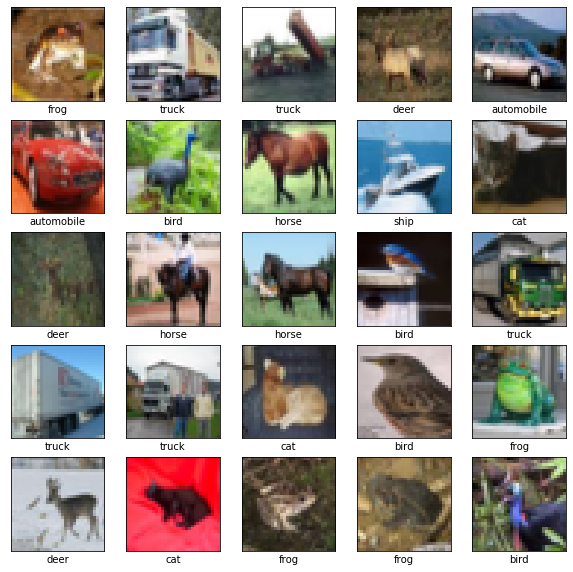

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

创建卷积基础

下面的6行代码使用一种常见的模式定义卷积基础：Conv2D和MaxPooling2D层的堆栈。

作为输入，CNN采用张量形状（image_height，image_width，color_channels），而忽略批大小。如果您不熟悉这些尺寸，则color_channels是指（R，G，B）。在此示例中，您将配置CNN以处理形状（32、32、3）的输入，这是CIFAR图像的格式。您可以通过将参数传递input_shape给我们的第一层来实现。

In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

到目前为止，让我们展示模型的架构。

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


在上面，您可以看到每个Conv2D和MaxPooling2D图层的输出是一个3D张量形状（高度，宽度，通道）。随着您深入网络，宽度和高度尺寸趋于缩小。每个Conv2D层的输出通道数由第一个参数（例如32或64）控制。通常，随着宽度和高度的缩小，您可以负担（在计算上）在每个Conv2D层中添加更多的输出通道。

在顶部添加密集层

为了完成我们的模型，您将从卷积基数（形状（形状为（3，3，64）））中最后一个输出张量馈入一个或多个Dense层中以执行分类。密集层将向量作为输入（一维），而当前输出是3D张量。首先，将3D输出展平（或展开）为1D，然后在顶部添加一个或多个Dense层。CIFAR具有10个输出类，因此您使用具有10个输出和softmax激活的最终Dense层。

In [6]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

这是我们模型的完整架构。

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

如您所见，我们的（3，3，64）输出在经过两个密集层之前被展平为形状为（576）的向量。

编译和训练模型

In [8]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 210us/sample - loss: 1.5027 - accuracy: 0.4510 - val_loss: 1.2551 - val_accuracy: 0.5449
Epoch 2/10
50000/50000 [==============================] - 8s 155us/sample - loss: 1.1505 - accuracy: 0.5938 - val_loss: 1.0627 - val_accuracy: 0.6269
Epoch 3/10
50000/50000 [==============================] - 8s 153us/sample - loss: 0.9996 - accuracy: 0.6481 - val_loss: 1.0256 - val_accuracy: 0.6354
Epoch 4/10
50000/50000 [==============================] - 8s 150us/sample - loss: 0.8894 - accuracy: 0.6898 - val_loss: 0.9907 - val_accuracy: 0.6584
Epoch 5/10
50000/50000 [==============================] - 8s 151us/sample - loss: 0.8244 - accuracy: 0.7111 - val_loss: 0.9110 - val_accuracy: 0.6886
Epoch 6/10
50000/50000 [==============================] - 8s 156us/sample - loss: 0.7614 - accuracy: 0.7343 - val_loss: 0.9024 - val_accuracy: 0.6914
Epoch 7/10
50000/50000 [=========================

评估模型

10000/1 - 1s - loss: 0.7756 - accuracy: 0.7086


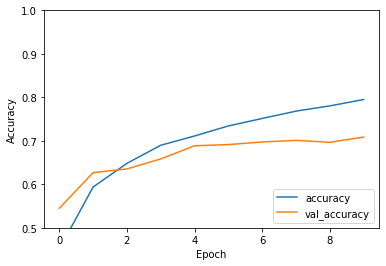

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(test_acc)

0.7086


我们简单的CNN达到了70％以上的测试准确性。几行代码还不错！有关另一种CNN样式，请参见使用Keras子类化API和here的示例。tf.GradientTape

## 改1

In [14]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(32, 32, 3),padding='SAME'))
model.add(layers.MaxPooling2D((3, 3),strides=(2,2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu',padding='SAME'))
model.add(layers.AvgPool2D((3, 3),strides=(2,2)))
model.add(layers.Conv2D(64, (5, 5), activation='relu',padding='SAME'))
model.add(layers.AvgPool2D((3, 3),strides=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [15]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 32)        25632     
_________________________________________________________________
average_pooling2d_1 (Average (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
average_pooling2d_2 (Average (None, 3, 3, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)              

In [16]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 9s 185us/sample - loss: 1.5788 - accuracy: 0.4151 - val_loss: 1.3480 - val_accuracy: 0.5146
Epoch 2/10
50000/50000 [==============================] - 9s 174us/sample - loss: 1.2186 - accuracy: 0.5679 - val_loss: 1.2163 - val_accuracy: 0.5680
Epoch 3/10
50000/50000 [==============================] - 9s 174us/sample - loss: 1.0416 - accuracy: 0.6330 - val_loss: 0.9871 - val_accuracy: 0.6524
Epoch 4/10
50000/50000 [==============================] - 9s 178us/sample - loss: 0.9215 - accuracy: 0.6777 - val_loss: 0.9360 - val_accuracy: 0.6744
Epoch 5/10
50000/50000 [==============================] - 9s 170us/sample - loss: 0.8379 - accuracy: 0.7063 - val_loss: 0.8556 - val_accuracy: 0.7057
Epoch 6/10
50000/50000 [==============================] - 9s 173us/sample - loss: 0.7855 - accuracy: 0.7233 - val_loss: 0.8958 - val_accuracy: 0.6934
Epoch 7/10
50000/50000 [==========================

10000/1 - 1s - loss: 0.7661 - accuracy: 0.7308


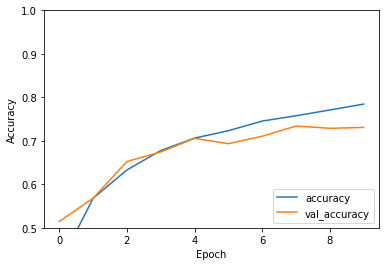

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [18]:
print(test_acc)

0.7308


## 改2

In [17]:
model = models.Sequential([
    layers.Conv2D(64,(3,3),input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(128,(3,3)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(256,(3,3)),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.MaxPooling2D((2,2)),
    
    layers.Flatten(),
    layers.Dense(1000),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Dense(666),
    layers.BatchNormalization(),
    layers.LeakyReLU(),
    layers.Dense(10, activation='softmax')])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
batch_normalization_10 (Batc (None, 30, 30, 64)        256       
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
batch_normalization_11 (Batc (None, 13, 13, 128)       512       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 13, 13, 128)      

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     featurewise_center=True,
#     featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    vertical_flip=True)
datagen.fit(train_images)

In [21]:
history = model.fit(datagen.flow(train_images, train_labels, batch_size=64), epochs=50, 
                    validation_data=(test_images, test_labels))

Train for 782 steps, validate on 10000 samples
Epoch 1/50
782/782 [==============================] - 30s 38ms/step - loss: 1.7073 - accuracy: 0.3834 - val_loss: 1.7921 - val_accuracy: 0.4004
Epoch 2/50
782/782 [==============================] - 29s 37ms/step - loss: 1.4485 - accuracy: 0.4771 - val_loss: 2.8059 - val_accuracy: 0.2627
Epoch 3/50
782/782 [==============================] - 28s 36ms/step - loss: 1.3348 - accuracy: 0.5242 - val_loss: 2.7103 - val_accuracy: 0.3545
Epoch 4/50
782/782 [==============================] - 29s 37ms/step - loss: 1.2603 - accuracy: 0.5486 - val_loss: 1.6790 - val_accuracy: 0.4841
Epoch 5/50
782/782 [==============================] - 29s 37ms/step - loss: 1.1994 - accuracy: 0.5717 - val_loss: 1.3870 - val_accuracy: 0.5450
Epoch 6/50
782/782 [==============================] - 29s 37ms/step - loss: 1.1558 - accuracy: 0.5885 - val_loss: 1.1883 - val_accuracy: 0.5796
Epoch 7/50
782/782 [==============================] - 29s 37ms/step - loss: 1.1161 - accu

10000/1 - 1s - loss: 0.5039 - accuracy: 0.7667


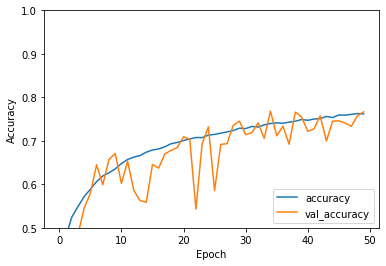

In [22]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [23]:
print(test_acc)

0.7667
